# Завдання

Наш продукт - персональний асистент за підпискою

Користувач спочатку потрапляє на сайт (click), де відповідає на питання, потім ми формуємо для нього ідеального асистента на основі його відповідей.

В кінці пропонуємо його купити (purchase)
В контрольній версії у нас заокруглені кнопки (Rounded rectangle)
В тестовій версії – суперелліпс (Squircle)


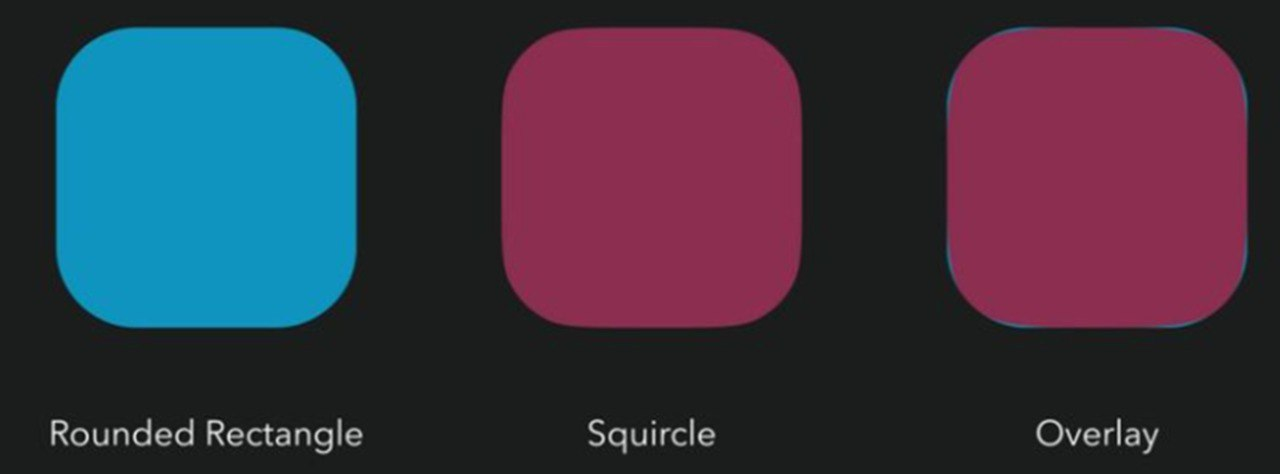

In [1]:
from IPython.display import Image

Image(filename='example1.jpg', width=400, height=300)

Обробимо наші дані:

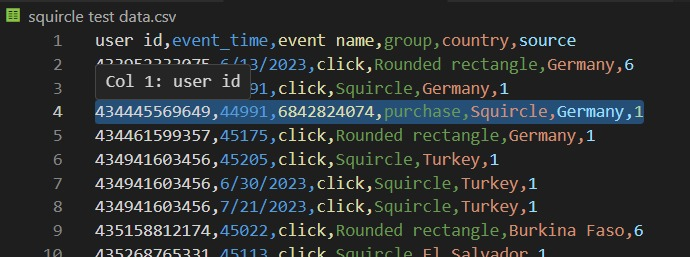

In [2]:
Image(filename='example2.jpeg', width=600, height=300)

маэмо справу з проблемним датасетом, оскільки деякі дані зміщені та потребують редагування. Для цього я скористаюсь Excel та виправлю ці недоліки:
(усі файли будуть підкріплені до роботи)

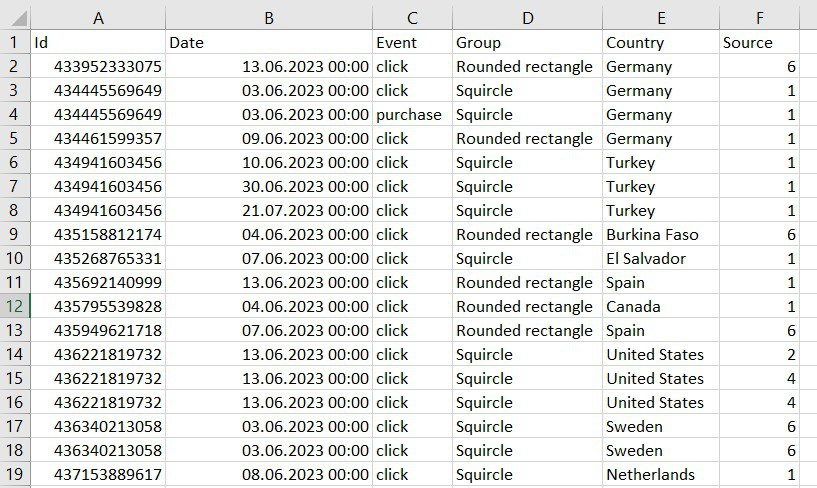

In [3]:
Image(filename='example3.jpg', width=600, height=300)

отримаємо вже більш вдалі дані для подвльшого аналізу за допомогою Python

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('squircle_test_data_fixed.csv', sep=';')
df

,Id,Date,Event,Group,Country,Source
0,433952333075,13.06.2023 00:00,click,Rounded rectangle,Germany,6.0
1,434445569649,03.06.2023 00:00,click,Squircle,Germany,1.0
2,434445569649,03.06.2023 00:00,purchase,Squircle,Germany,1.0
3,434461599357,09.06.2023 00:00,click,Rounded rectangle,Germany,1.0
4,434941603456,10.06.2023 00:00,click,Squircle,Turkey,1.0
...,...,...,...,...,...,...
257307,685139888953,22.07.2023 00:00,click,Squircle,United Arab Emirates,NaN
257308,685245954752,22.07.2023 00:00,click,Squircle,Bahamas,NaN
257309,685253768774,22.07.2023 00:00,click,Squircle,United States,4.0
257310,685321577596,22.07.2023 00:00,click,Squircle,Egypt,NaN


там де Source NaN замінемо на 0:

In [6]:
df['Source'] = df['Source'].fillna(0)

Проаналізуємо дані:

In [7]:
print("Кількість унікальних 'Id':", len(df['Id'].unique()), '  Загальна кількість: ', len(df['Id']))
print("Кількість унікальних 'Date':", len(df['Date'].unique()))
print("Кількість унікальних 'Event':", len(df['Event'].unique()))
print("Кількість унікальних 'Group':", len(df['Group'].unique()))
print("Кількість унікальних 'Country':", len(df['Country'].unique()))
print("Кількість унікальних 'Source':", len(df['Source'].unique()))


Кількість унікальних 'Id': 218466   Загальна кількість:  257312
Кількість унікальних 'Date': 1214
Кількість унікальних 'Event': 2
Кількість унікальних 'Group': 2
Кількість унікальних 'Country': 221
Кількість унікальних 'Source': 11


Перевіримо розбиття датасету. Для цього розділимо на групи та подивимось на кількість даних у кожній групі:

In [8]:
df.groupby(['Group', 'Event'])['Id'].count()

Group              Event   
Rounded rectangle  click       123414
                   purchase      4399
Squircle           click       124952
                   purchase      4547
Name: Id, dtype: int64

наш датасет розділен майже порівну, тому продовжуємо дослідження
Розглянемо кількість унікальних даних для цбого датасету:

In [9]:
df.groupby(['Group', 'Event'])[['Id', 'Date', 'Country','Source']].nunique()

Id  Date  Country  Source
Group             Event                                  
Rounded rectangle click     105805    93      211      11
                  purchase    3561   625      109      11
Squircle          click     106665    90      212      11
                  purchase    3717   647      104      11

дійсно маємо дуже рівномірне розбиття по кількості унікальних користувачів та країн

Розглянемо на розподілення кількості відвідувачів по дням:

In [10]:
from dateutil.parser import parse
df['Date'] = df['Date'].apply(lambda x: parse(x))
df['Date'] = df['Date'].dt.date

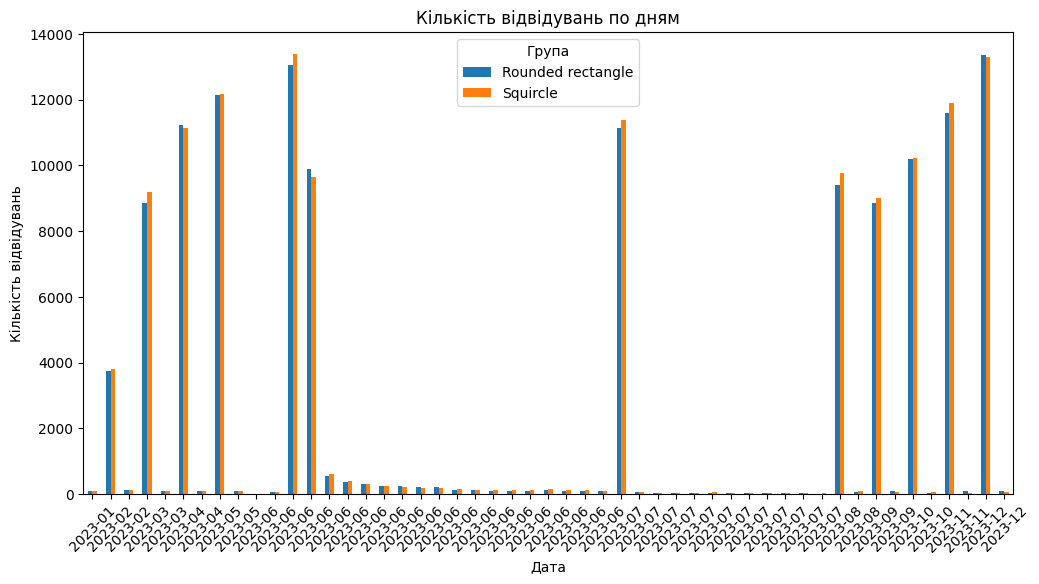

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M', errors='coerce')
daily_visits = df.groupby(['Date', 'Group']).size().unstack().fillna(0)
month_labels = daily_visits.index.to_period('M').strftime('%Y-%m')

ax = daily_visits.plot(kind='bar', figsize=(12, 6))
plt.title('Кількість відвідувань по дням')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувань')
plt.xticks(range(len(month_labels)), month_labels, rotation=45)
plt.legend(title='Група')
plt.show()

Маємо не рівномірне розподілення кількості відвідувачів по дням, проте кількість людей кожного дня з двох груп приблизно рівна, що є гарним показником для дослідження

Тепер введемо конверсію для нашого датасету </p>
Очевидно, що в нашому випадку конверсія буде дорівнювати </p>
`conversion = count(purchase)/count(click)` </p>
Введемо значення конверсії для кожного дня: </p>

In [48]:
grouped_data = df.groupby(['Date', 'Group', 'Event']).size().unstack().fillna(0)
grouped_data['conversion'] = grouped_data['purchase'] / grouped_data['click']
grouped_data=grouped_data.unstack()
grouped_data.head()

Event                  click                   purchase            
Group      Rounded rectangle Squircle Rounded rectangle Squircle   
Date                                                               
2023-01-07              79.0     84.0               9.0     10.0  \
2023-02-06            3615.0   3677.0             131.0    135.0   
2023-02-07             105.0    116.0               5.0      0.0   
2023-03-06            8534.0   8846.0             309.0    343.0   
2023-03-07              88.0    106.0               7.0      2.0   

Event             conversion            
Group      Rounded rectangle  Squircle  
Date                                    
2023-01-07          0.113924  0.119048  
2023-02-06          0.036238  0.036715  
2023-02-07          0.047619  0.000000  
2023-03-06          0.036208  0.038775  
2023-03-07          0.079545  0.018868

додамо показник різниці конверсії (conversion_diff) </p>
якщо він нижче 0, то тестова кнопка дала гіршу конверсію, інакше кращу:

In [49]:
grouped_data['conversion_diff'] = grouped_data['conversion']['Squircle'] - grouped_data['conversion']['Rounded rectangle']
grouped_data

Event                  click                   purchase            
Group      Rounded rectangle Squircle Rounded rectangle Squircle   
Date                                                               
2023-01-07              79.0     84.0               9.0     10.0  \
2023-02-06            3615.0   3677.0             131.0    135.0   
2023-02-07             105.0    116.0               5.0      0.0   
2023-03-06            8534.0   8846.0             309.0    343.0   
2023-03-07              88.0    106.0               7.0      2.0   
2023-04-06           10791.0  10756.0             437.0    396.0   
2023-04-07              74.0     99.0               8.0      2.0   
2023-05-06           11684.0  11709.0             450.0    454.0   
2023-05-07              83.0     74.0               4.0     12.0   
2023-06-06              16.0     12.0               0.0      0.0   
2023-06-07              69.0     68.0               1.0      4.0   
2023-06-13           12656.0  12925.0             413.0    462.0   
2023-06-14            9613.0   9349.0             286.0    290.0   
2023-06-15             546.0    605.0              17.0     20.0   
2023-06-16             364.0    372.0              18.0     15.0   
2023-06-17             303.0    285.0               0.0     13.0   
2023-06-18             239.0    227.0               9.0     24.0   
2023-06-19             243.0    201.0              17.0      7.0   
2023-06-20             204.0    184.0              16.0      8.0   
2023-06-21             198.0    165.0              10.0      5.0   
2023-06-22             116.0    160.0               6.0      3.0   
2023-06-23             115.0    113.0               7.0      1.0   
2023-06-24              99.0    132.0               4.0      4.0   
2023-06-25              79.0    115.0               2.0      3.0   
2023-06-26              87.0    124.0               4.0      7.0   
2023-06-27             110.0    142.0               3.0      6.0   
2023-06-28              95.0    123.0               8.0      6.0   
2023-06-29              79.0    104.0               6.0      5.0   
2023-06-30              88.0     94.0               1.0      6.0   
2023-07-06           10752.0  10980.0             389.0    407.0   
2023-07-07              51.0     70.0               9.0      0.0   
2023-07-13              32.0     44.0               0.0      0.0   
2023-07-14              23.0     37.0               4.0      5.0   
2023-07-15              31.0     38.0               0.0      0.0   
2023-07-16              36.0     33.0               3.0     17.0   
2023-07-17              26.0     33.0               0.0      0.0   
2023-07-18              25.0     39.0               2.0      0.0   
2023-07-19              27.0     37.0               1.0      0.0   
2023-07-20              25.0     22.0               0.0      0.0   
2023-07-21              27.0     22.0               4.0      0.0   
2023-07-22               8.0     19.0               5.0      8.0   
2023-08-06            9090.0   9472.0             299.0    300.0   
2023-08-07              77.0     77.0               0.0      2.0   
2023-09-06            8557.0   8695.0             287.0    307.0   
2023-09-07              77.0     55.0               2.0      4.0   
2023-10-06            9865.0   9890.0             324.0    330.0   
2023-10-07              47.0     61.0               0.0      3.0   
2023-11-06           11211.0  11443.0             396.0    458.0   
2023-11-07              40.0     41.0              41.0      2.0   
2023-12-06           12925.0  12828.0             445.0    461.0   
2023-12-07              90.0     49.0               0.0      0.0   

Event             conversion           conversion_diff  
Group      Rounded rectangle  Squircle                  
Date                                                    
2023-01-07          0.113924  0.119048        0.005124  
2023-02-06          0.036238  0.036715        0.000477  
2023-02-07          0.047619  0.000000    

Доцільно розглянути граік на проміжку від 2023-06-06 до 2023-07-22. Оскільки на цьому проміжку маємо дані майже за коден день:

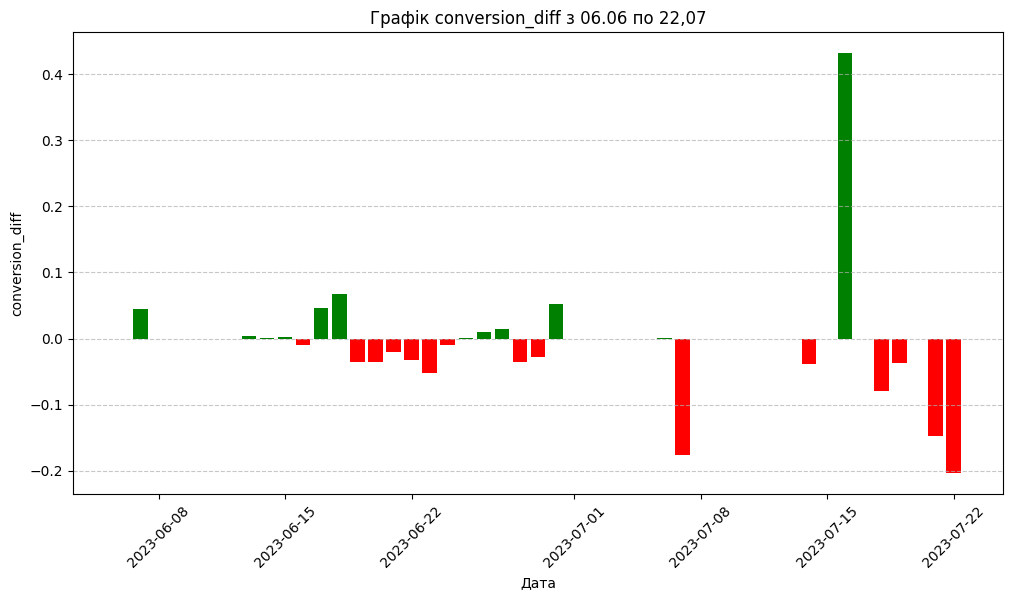

In [50]:
filtered_data = grouped_data['2023-06-06':'2023-07-22']

plt.figure(figsize=(12, 6))
plt.bar(filtered_data.index, filtered_data[('conversion_diff', '')], color=['g' if x >= 0 else 'r' for x in filtered_data[('conversion_diff', '')]])
plt.xlabel('Дата')
plt.ylabel('conversion_diff')
plt.title('Графік conversion_diff з 06.06 по 22,07')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Розглянемо середню різницю конверсії та загалом середні показники конверсії для двух випадків

In [51]:
grouped_data['conversion_diff'].mean()

-0.023352907458847674

In [52]:
grouped_data['conversion'].mean()

Group
Rounded rectangle    0.077373
Squircle             0.054020
dtype: float64

Тепер розглянемо ці показники для проміжку ['2023-06-06':'2023-07-22']

In [53]:
filtered_data['conversion_diff'].mean()

-0.00832748245871848

In [54]:
filtered_data['conversion'].mean()

Group
Rounded rectangle    0.068037
Squircle             0.059710
dtype: float64

Як бачимо на тестова версія дала навіть гіршу конверсію за контрольну. Проте, якщо розглядати лише проміжок ['2023-06-06':'2023-07-22'], то тут різниця конверсій набагато меньша, проте, все одно контролна версія має кращу конверсію

#### Висновок:
Важко дати выдповідь на поставлену задачу, оскільки дві версії є візуально схожими і тому ми отримали дуже близькі дані конверсії в контрольній та тестовій версіях. Також датасет не мав дані за всі дні, тому при доцільно розглядати конверсії на проміжку від 2023-06-06 до 2023-07-22. На обмеженому проміжку ми отримали сході результати, проте контрольна версія виявилась трохи кращою за тестову. Саме тому я б залишив старий дизайн кнопки, оскільки оновлення її не дасть потрібного результату.